# Image preprocessing applied (in Handwritten dataset class) 

Testing to see the augmentations conducted during the process. 

In [1]:
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
# Below code causes all modules to be reloaded before running user code.
%load_ext autoreload
%autoreload 2

In [2]:
from handwriting_recognition.data_downloader import get_dataset_folder_path
from handwriting_recognition.processing_helpers import process_single_image
from IPython.display import Image as show_im
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np 
import os
import pandas as pd

c:\Users\User\AppData\Local\pypoetry\Cache\virtualenvs\handwriting-recognition-mEqlV94N-py3.12\Lib\site-packages\pydantic\_internal\_fields.py:160: UserWarning: Field "model_name" has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(


In [10]:
# Grab image folder
im_folder = get_dataset_folder_path() / "raw" / "test"

# Select a random image from image folder
random_image = np.random.choice(os.listdir(im_folder)) 
image_path = get_dataset_folder_path() / "raw" / "test" / random_image

# Set a location to store results
out_dir = get_dataset_folder_path() / 'test'

# Load in labels
labels_df = pd.read_csv(get_dataset_folder_path() / "raw" / "test.csv")

In [11]:
show_im(image_path)

In [12]:
labels_df[labels_df['FILENAME'] == random_image]

,FILENAME,IDENTITY
6061,TEST_6062.jpg,LASSANA


In [33]:
image = np.array(Image.open(image_path))
print(image.shape)
print(image[0:1]) # a row of pixel values

(20, 388, 3)
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


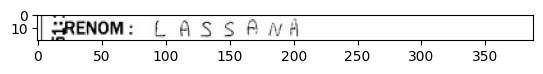

In [34]:
plt.imshow(image) # seeing the visual through np.array form

In [35]:
image = image.astype(np.float32)
print(image.shape)
print(image[0:1]) # a row of pixel values

(20, 388, 3)
[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


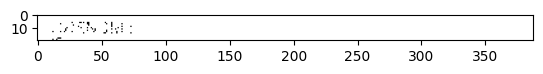

In [36]:
plt.imshow(image)

Now we will be applying the methods that applied within the dataset class HandWritingDataset

original image dimension = (20, 388, 3)
augmented image dimension = (12, 224, 3)


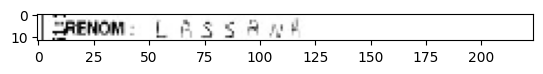

In [68]:
import albumentations as A
import cv2

# Scale the image based on the max length/size for the image.
augmentations = A.Compose([
  A.LongestMaxSize(
      max_size=224, # this is specified in our config. It is the required size for the ViT model. i.e. 224
      p=1, # probability of applying the transformation
      interpolation=cv2.INTER_NEAREST # will use nearest neighbour pixel interpolation. https://pyimagesearch.com/2021/01/20/opencv-resize-image-cv2-resize/
  ),
])

aug_img = augmentations(image=image, force_apply=True)['image']
print(f'original image dimension = {image.shape}')
print(f'augmented image dimension = {aug_img.shape}')
plt.imshow(aug_img.astype(np.int32))

original image dimension = (20, 388, 3)
augmented image1 dimension = (12, 224, 3)
augmented image2 dimension = (224, 388, 3)


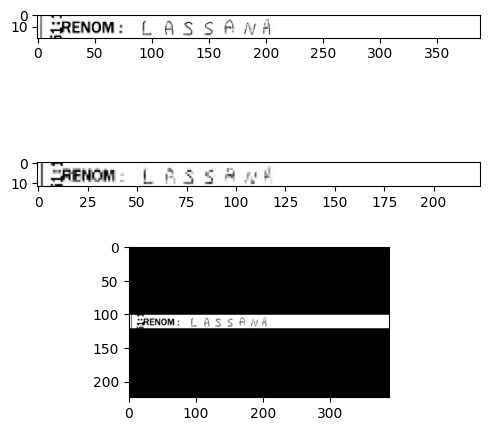

In [83]:
# Now we add padding so to get a 224 by 224 image for the ViT model.
augmentations2 = A.Compose([
  A.PadIfNeeded(
      min_height=224, 
      min_width=224, 
      value=1, # Specifying the value for the padding to be if padding is constant.
      border_mode=cv2.BORDER_CONSTANT # telling the method to provide constant values as padding.
),
])

aug_img2 = augmentations2(image=aug_img, force_apply=True)['image']

aug_img2 = augmentations2(image=image, force_apply=True)['image']
print(f'original image dimension = {image.shape}')
print(f'augmented image1 dimension = {aug_img.shape}')
print(f'augmented image2 dimension = {aug_img2.shape}')

fig, axes = plt.subplots(3, figsize=(5, 5))
axes[0].imshow(image.astype(np.int32))
axes[1].imshow(aug_img.astype(np.int32))
axes[2].imshow(aug_img2.astype(np.int32))
plt.tight_layout()
plt.show()

In [82]:
from albumentations.pytorch import ToTensorV2

# Last step is to create a tensor for the model to use the image data. 
augmentations3 = A.Compose([ToTensorV2(),]) 

aug_img3 = augmentations3(image=aug_img2, force_apply=True)["image"]

That is all the preprocessing that is applied in this machine learning project.